In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [100]:
df = pd.read_csv('../Data/input_simple_impute.csv')

In [101]:
type(df)

pandas.core.frame.DataFrame

In [102]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,Juanna,Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,Altark,Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,Solam,Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,Willy,Santantines,F,1,S


In [103]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ImputedValues
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.821696,224.947314,457.432877,172.513517,311.310480,303.785460,0.503624,0.129069
std,14.482131,666.643538,1614.759828,599.569039,1137.655417,1139.104574,0.500016,0.351707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,38.000000,48.000000,75.000000,26.000000,59.000000,46.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,2.000000


In [104]:
df.drop(columns='Cabin', inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,Juanna,Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,Altark,Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,Solam,Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,Willy,Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,Gravior,Noxnuther,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,Kurta,Mondalley,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,Fayey,Connon,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,0,Celeon,Hontichre,E,608,S


In [105]:
df.loc[df['CabinRoom'] == '*MISSING*', 'CabinRoom'] = 1600

In [106]:
df['CabinRoom'] = df['CabinRoom'].astype(int)

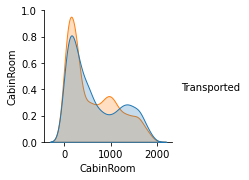

In [107]:
sns.pairplot(df[['CabinRoom', 'Transported']], hue='Transported');

In [108]:
sorted(df['HomePlanet'].unique())

['*MISSING*', 'Earth', 'Europa', 'Mars']

In [109]:
df['HomePlanet'][df['HomePlanet'] == '*MISSING*']

59      *MISSING*
113     *MISSING*
186     *MISSING*
225     *MISSING*
234     *MISSING*
          ...    
8515    *MISSING*
8613    *MISSING*
8666    *MISSING*
8674    *MISSING*
8684    *MISSING*
Name: HomePlanet, Length: 201, dtype: object

In [110]:
labels = sorted(df['HomePlanet'].unique())
n = 0
for label in labels:
    df.loc[df['HomePlanet'] == label, 'HomePlanet'] = n
    n += 1
df['HomePlanet'].unique()

array([2, 1, 3, 0], dtype=object)

In [111]:
def encode_categorical(df, column_name):
    labels = sorted(df[column_name].unique())
    n = 0
    for label in labels:
        df.loc[df[column_name] == label, column_name] = n
        n += 1
    return None

In [112]:
encode_categorical(df, 'CryoSleep')

In [114]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass
0,0001_01,2,1,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,Maham,Ofracculy,B,0,P
1,0002_01,1,1,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,Juanna,Vines,F,0,S
2,0003_01,2,1,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,Altark,Susent,A,0,S
3,0003_02,2,1,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,Solam,Susent,A,0,S
4,0004_01,1,1,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,Willy,Santantines,F,1,S


In [115]:
to_encode = ['Destination', 'VIP', 'LastName', 'CabinSector', 'CabinClass']

In [116]:
for column in to_encode:
    encode_categorical(df, column)

In [117]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass
0,0001_01,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,Maham,1432,2,0,1
1,0002_01,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,Juanna,2110,6,0,2
2,0003_01,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,Altark,1991,1,0,2
3,0003_02,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,Solam,1991,1,0,2
4,0004_01,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,Willy,1779,6,1,2


In [121]:
features = df.columns.to_list()
to_remove = ['PassengerId', 'Name', 'ImputedValues', 'FirstName']
for feature in to_remove:
    features.remove(feature)
features

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'LastName',
 'CabinSector',
 'CabinRoom',
 'CabinClass']

In [125]:
df[df['CryoSleep'] == 2]['Transported'].value_counts()

1    2483
0     554
Name: Transported, dtype: int64

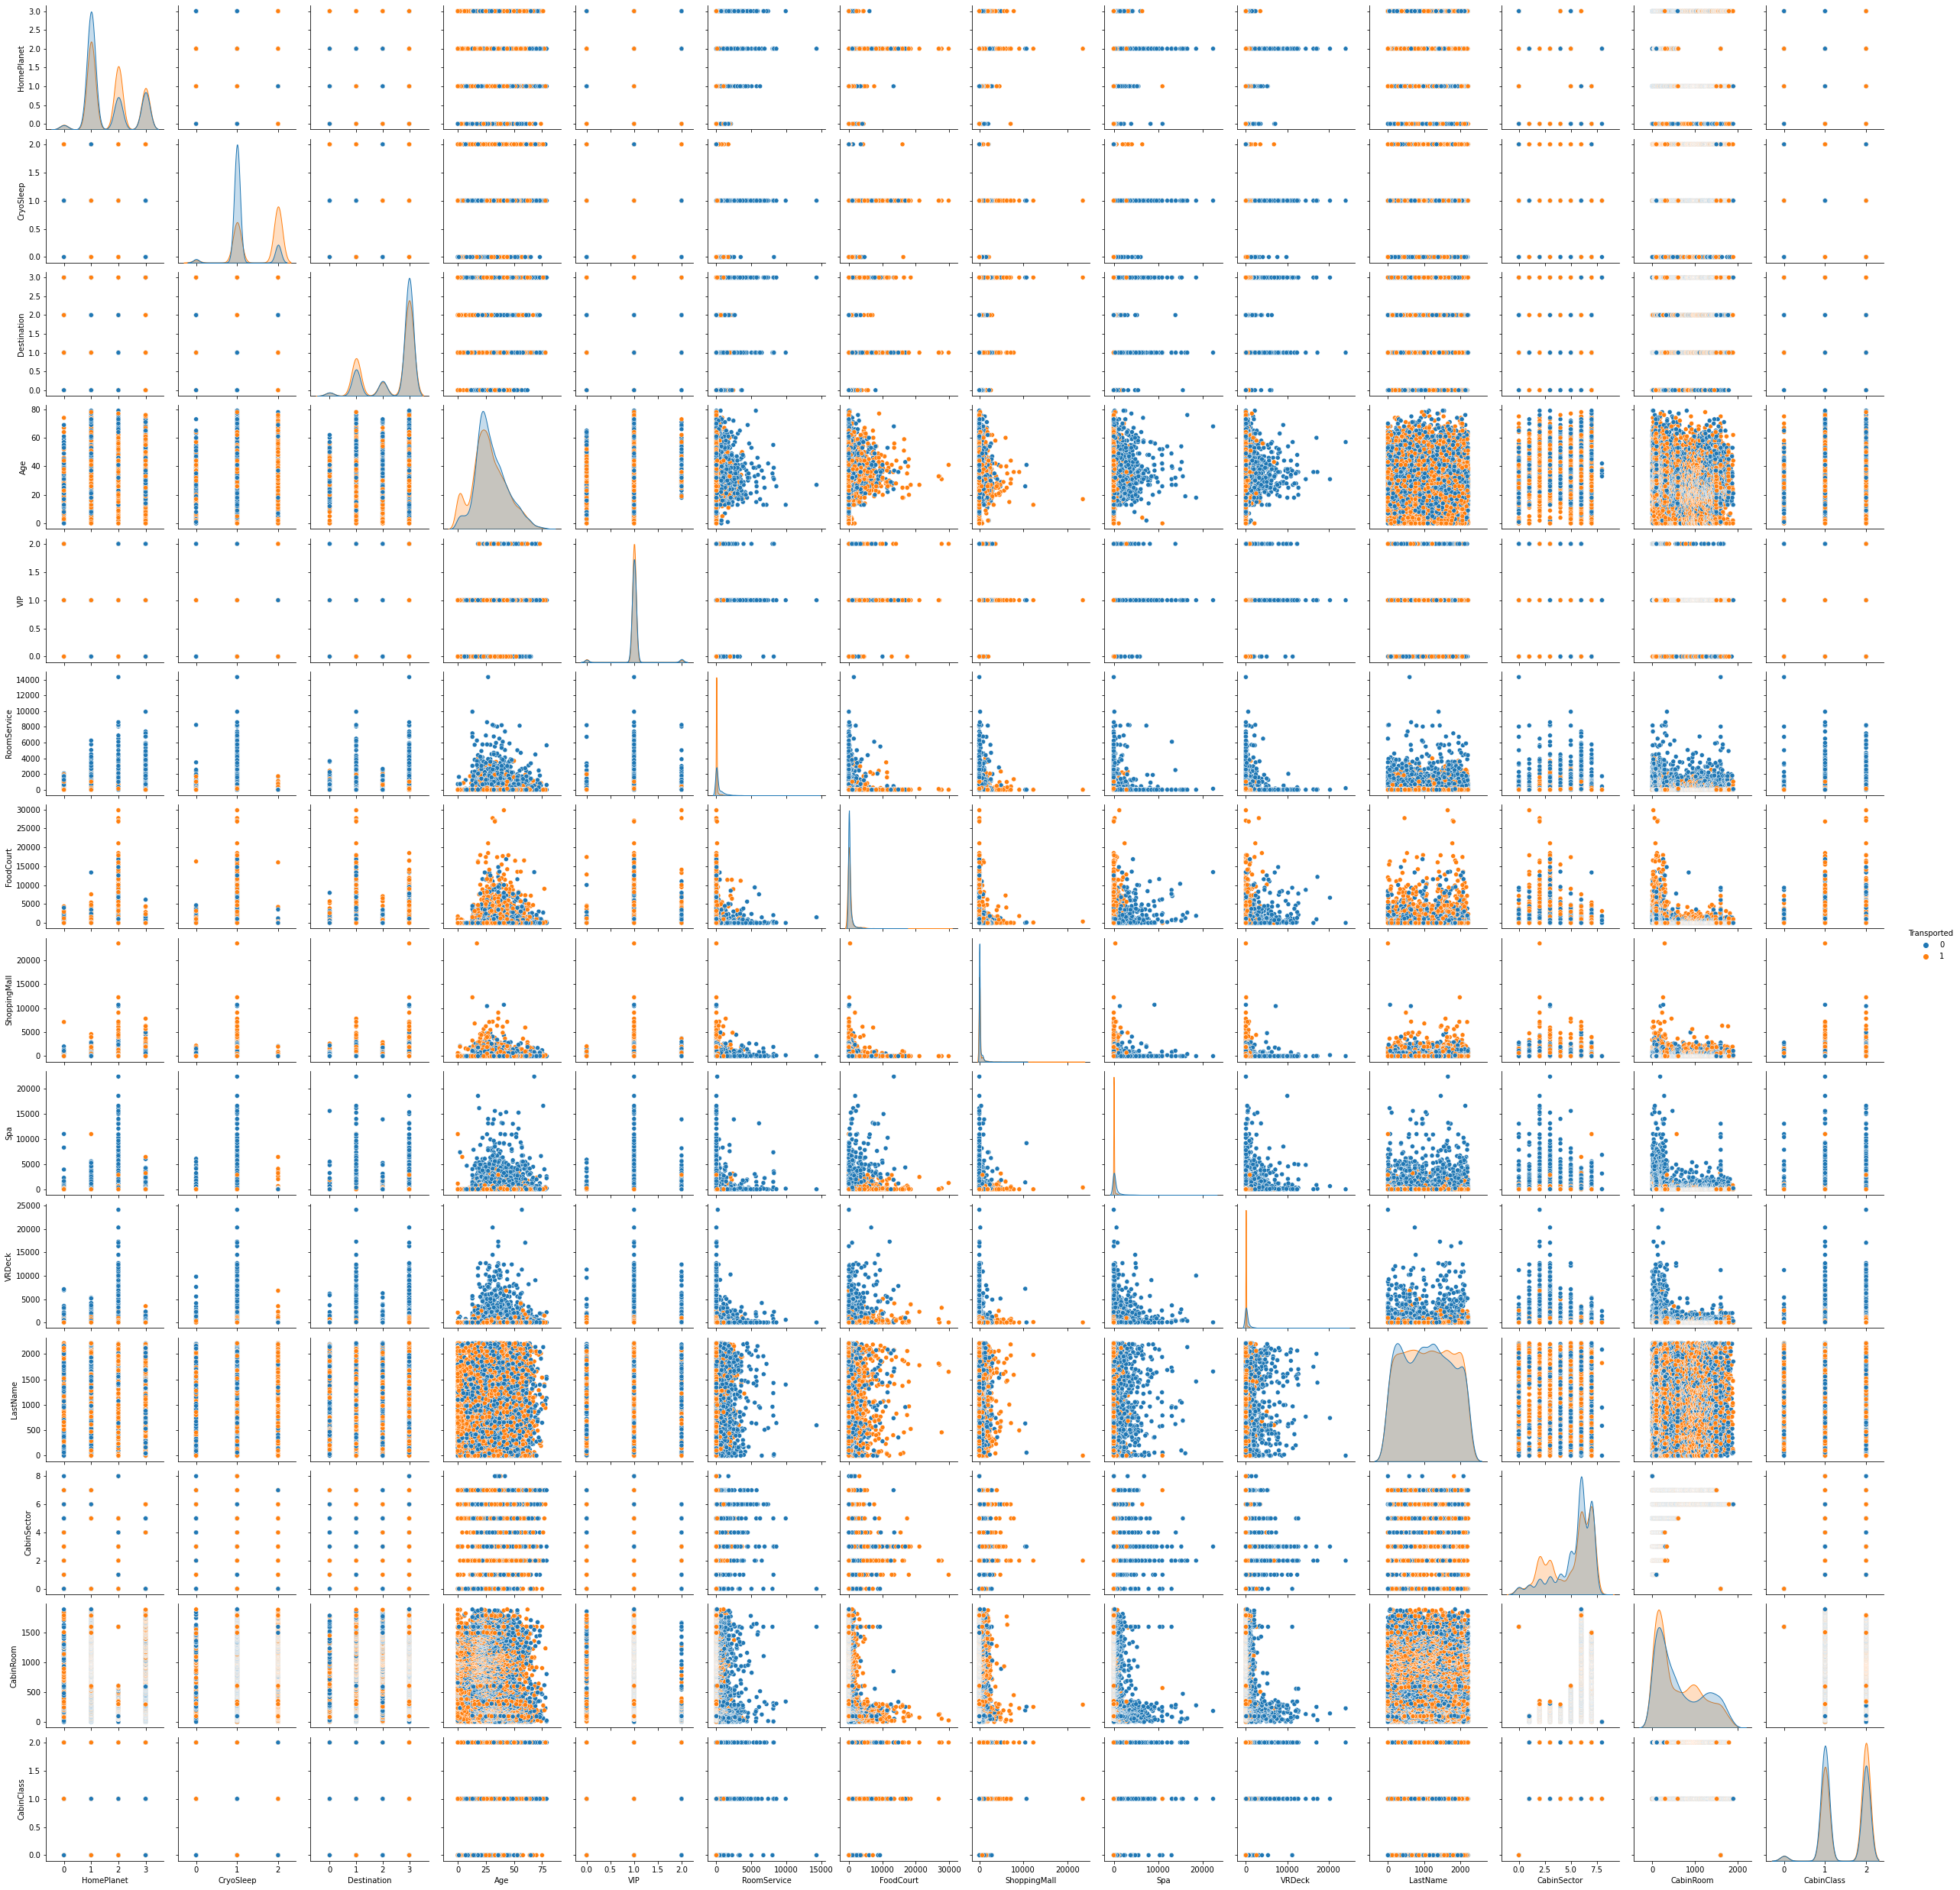

In [122]:
sns.pairplot(df[features], hue='Transported');

How do I take pairplots of interest and make them analyzable? I want to be able to bound regions of interest.
Also, I'd like to look at mixed effects in a coherent manner. I don't like the idea of simply multiplying categories into one another, because completely different combinations of things could produce the same combined output (3 x 4 == 4 x 3 while horse x stripes != bear x dots, with horse being encoded 3 for animals, etc.)

For categorical mixed effect encoding, I'm thinking produce a string based on the variable and code for each item to be mixed, concat those items, then encode in the same way we did before for the vanilla variables:

In [126]:
df[['HomePlanet', 'Destination']]

,HomePlanet,Destination
0,2,3
1,1,3
2,2,3
3,2,3
4,1,3
...,...,...
8688,2,1
8689,1,2
8690,1,3
8691,2,1


In [157]:
df['HomePlanet_X_Destination'] = 'hp' + df['HomePlanet'].astype(str) + 'dest' + df['Destination'].astype(str)

In [158]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass,HomePlanet_X_Destination
0,0001_01,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,Maham,1432,2,0,1,hp2dest3
1,0002_01,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,Juanna,2110,6,0,2,hp1dest3
2,0003_01,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,Altark,1991,1,0,2,hp2dest3
3,0003_02,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,Solam,1991,1,0,2,hp2dest3
4,0004_01,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,Willy,1779,6,1,2,hp1dest3


In [164]:
[(idx, label) for idx, label in enumerate(sorted(df['HomePlanet_X_Destination'].unique()))]

[(0, 'hp0dest0'),
 (1, 'hp0dest1'),
 (2, 'hp0dest2'),
 (3, 'hp0dest3'),
 (4, 'hp1dest0'),
 (5, 'hp1dest1'),
 (6, 'hp1dest2'),
 (7, 'hp1dest3'),
 (8, 'hp2dest0'),
 (9, 'hp2dest1'),
 (10, 'hp2dest2'),
 (11, 'hp2dest3'),
 (12, 'hp3dest0'),
 (13, 'hp3dest1'),
 (14, 'hp3dest2'),
 (15, 'hp3dest3')]

In [165]:
encode_categorical(df, 'HomePlanet_X_Destination')

In [166]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass,HomePlanet_X_Destination
0,0001_01,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,Maham,1432,2,0,1,11
1,0002_01,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,Juanna,2110,6,0,2,7
2,0003_01,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,Altark,1991,1,0,2,11
3,0003_02,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,Solam,1991,1,0,2,11
4,0004_01,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,Willy,1779,6,1,2,7


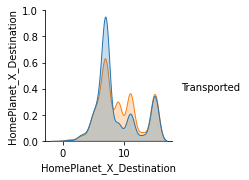

In [167]:
sns.pairplot(df[['HomePlanet_X_Destination', 'Transported']], hue='Transported')

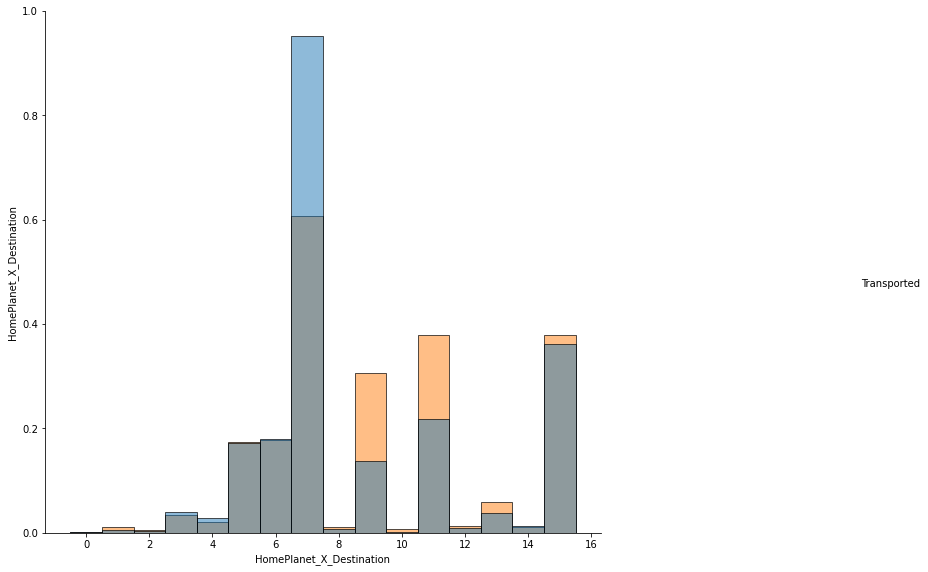

In [182]:
g = sns.pairplot(df[['HomePlanet_X_Destination', 'Transported']], hue='Transported', diag_kind='hist', diag_kws={'discrete':True})
g.fig.set_size_inches(15,10)

In [203]:
def encode_categorical(df, column_name):
    labels = sorted(df[column_name].unique())
    decode_key = [(idx, label) for idx, label in enumerate(sorted(df[column_name].unique()))]
    n = 0
    for label in labels:
        df.loc[df[column_name] == label, column_name] = n
        n += 1
    return decode_key

In [211]:
def create_mixed_categorical(df, col_name_1, col_name_2):
    mixed_column = col_name_1 + '_X_' + col_name_2
    df[mixed_column] = col_name_1 + df[col_name_1].astype(str) + col_name_2 + df[col_name_2].astype(str)
    
    return encode_categorical(df, mixed_column)

In [212]:
age_cryo_key = create_mixed_categorical(df, 'Age', 'CryoSleep')

In [213]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass,HomePlanet_X_Destination,Age_X_CryoSleep
0,0001_01,2,1,3,39.0,1,0.0,0.0,0.0,0.0,...,Maham Ofracculy,0,0,Maham,1432,2,0,1,11,99
1,0002_01,1,1,3,24.0,1,109.0,9.0,25.0,549.0,...,Juanna Vines,1,0,Juanna,2110,6,0,2,7,51
2,0003_01,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,...,Altark Susent,0,0,Altark,1991,1,0,2,11,161
3,0003_02,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,...,Solam Susent,0,0,Solam,1991,1,0,2,11,81
4,0004_01,1,1,3,16.0,1,303.0,70.0,151.0,565.0,...,Willy Santantines,1,0,Willy,1779,6,1,2,7,24


In [214]:
age_cryo_key

[(0, 'Age0.0CryoSleep0'),
 (1, 'Age0.0CryoSleep1'),
 (2, 'Age0.0CryoSleep2'),
 (3, 'Age1.0CryoSleep0'),
 (4, 'Age1.0CryoSleep1'),
 (5, 'Age1.0CryoSleep2'),
 (6, 'Age10.0CryoSleep1'),
 (7, 'Age10.0CryoSleep2'),
 (8, 'Age11.0CryoSleep0'),
 (9, 'Age11.0CryoSleep1'),
 (10, 'Age11.0CryoSleep2'),
 (11, 'Age12.0CryoSleep0'),
 (12, 'Age12.0CryoSleep1'),
 (13, 'Age12.0CryoSleep2'),
 (14, 'Age13.0CryoSleep0'),
 (15, 'Age13.0CryoSleep1'),
 (16, 'Age13.0CryoSleep2'),
 (17, 'Age14.0CryoSleep0'),
 (18, 'Age14.0CryoSleep1'),
 (19, 'Age14.0CryoSleep2'),
 (20, 'Age15.0CryoSleep0'),
 (21, 'Age15.0CryoSleep1'),
 (22, 'Age15.0CryoSleep2'),
 (23, 'Age16.0CryoSleep0'),
 (24, 'Age16.0CryoSleep1'),
 (25, 'Age16.0CryoSleep2'),
 (26, 'Age17.0CryoSleep0'),
 (27, 'Age17.0CryoSleep1'),
 (28, 'Age17.0CryoSleep2'),
 (29, 'Age18.0CryoSleep0'),
 (30, 'Age18.0CryoSleep1'),
 (31, 'Age18.0CryoSleep2'),
 (32, 'Age19.0CryoSleep0'),
 (33, 'Age19.0CryoSleep1'),
 (34, 'Age19.0CryoSleep2'),
 (35, 'Age2.0CryoSleep0'),
 (36, 'Ag

<AxesSubplot:xlabel='Age_X_CryoSleep', ylabel='Count'>

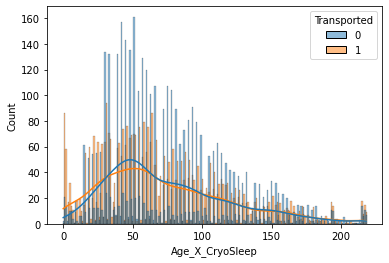

In [258]:
sns.histplot(x='Age_X_CryoSleep', data=df, hue='Transported', discrete=True, kde=True)

In [296]:
def plot_hue_hist(df, target_name, hue_name, ax=None, kde=True):
    g = sns.histplot(x=target_name, data=df, hue=hue_name, discrete=True, ax=ax, kde=kde)
    
def plot_hue_kde(df, target_name, hue_name, ax=None, fill=True):
    g = sns.kdeplot(x=target_name, data=df, hue=hue_name, ax=ax)

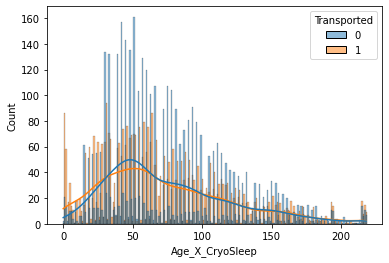

In [262]:
plot_hue_hist(df, 'Age_X_CryoSleep', 'Transported')

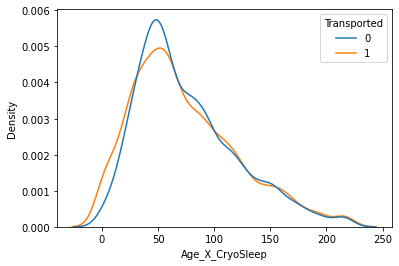

In [265]:
plot_hue_kde(df, 'Age_X_CryoSleep', 'Transported')

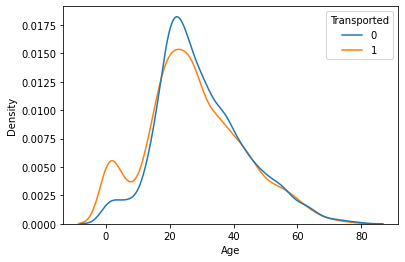

In [266]:
plot_hue_kde(df, 'Age', 'Transported')

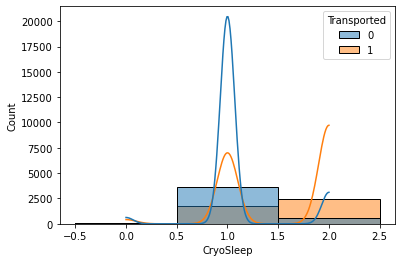

In [267]:
plot_hue_hist(df, 'CryoSleep', 'Transported')

In [225]:
cryo_age_key = create_mixed_categorical(df, 'CryoSleep', 'Age')

In [226]:
cryo_age_key

[(0, 'CryoSleep0Age0.0'),
 (1, 'CryoSleep0Age1.0'),
 (2, 'CryoSleep0Age11.0'),
 (3, 'CryoSleep0Age12.0'),
 (4, 'CryoSleep0Age13.0'),
 (5, 'CryoSleep0Age14.0'),
 (6, 'CryoSleep0Age15.0'),
 (7, 'CryoSleep0Age16.0'),
 (8, 'CryoSleep0Age17.0'),
 (9, 'CryoSleep0Age18.0'),
 (10, 'CryoSleep0Age19.0'),
 (11, 'CryoSleep0Age2.0'),
 (12, 'CryoSleep0Age20.0'),
 (13, 'CryoSleep0Age21.0'),
 (14, 'CryoSleep0Age22.0'),
 (15, 'CryoSleep0Age23.0'),
 (16, 'CryoSleep0Age24.0'),
 (17, 'CryoSleep0Age25.0'),
 (18, 'CryoSleep0Age26.0'),
 (19, 'CryoSleep0Age27.0'),
 (20, 'CryoSleep0Age28.0'),
 (21, 'CryoSleep0Age29.0'),
 (22, 'CryoSleep0Age3.0'),
 (23, 'CryoSleep0Age30.0'),
 (24, 'CryoSleep0Age31.0'),
 (25, 'CryoSleep0Age32.0'),
 (26, 'CryoSleep0Age33.0'),
 (27, 'CryoSleep0Age34.0'),
 (28, 'CryoSleep0Age35.0'),
 (29, 'CryoSleep0Age36.0'),
 (30, 'CryoSleep0Age37.0'),
 (31, 'CryoSleep0Age38.0'),
 (32, 'CryoSleep0Age39.0'),
 (33, 'CryoSleep0Age4.0'),
 (34, 'CryoSleep0Age40.0'),
 (35, 'CryoSleep0Age41.0'),
 (36, '

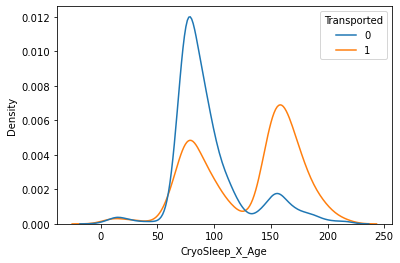

In [268]:
plot_hue_kde(df, 'CryoSleep_X_Age', 'Transported')

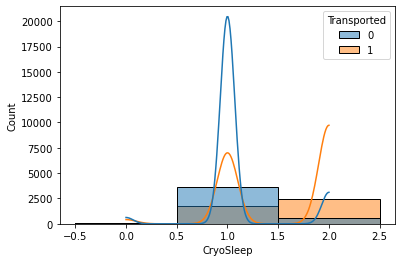

In [269]:
plot_hue_hist(df, 'CryoSleep', 'Transported')

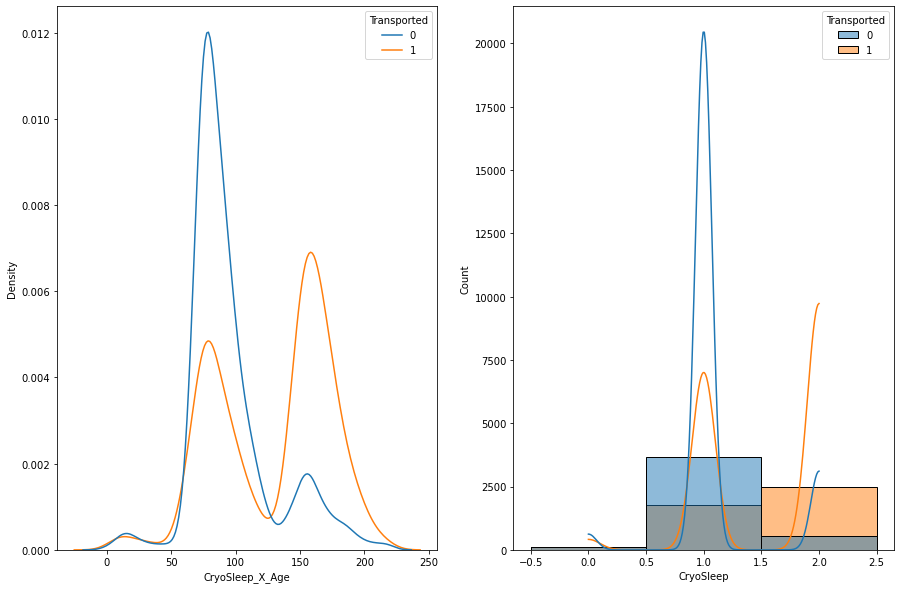

In [274]:
fig, axs = plt.subplots(ncols=2, figsize=(15,10))
plot_hue_kde(df, 'CryoSleep_X_Age', 'Transported', ax=axs[0])
plot_hue_hist(df, 'CryoSleep', 'Transported', ax=axs[1])

In [275]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass,HomePlanet_X_Destination,Age_X_CryoSleep,CryoSleep_X_Age
0,0001_01,2,1,3,39.0,1,0.0,0.0,0.0,0.0,...,0,0,Maham,1432,2,0,1,11,99,94
1,0002_01,1,1,3,24.0,1,109.0,9.0,25.0,549.0,...,1,0,Juanna,2110,6,0,2,7,51,78
2,0003_01,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,...,0,0,Altark,1991,1,0,2,11,161,115
3,0003_02,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,...,0,0,Solam,1991,1,0,2,11,81,88
4,0004_01,1,1,3,16.0,1,303.0,70.0,151.0,565.0,...,1,0,Willy,1779,6,1,2,7,24,69


In [291]:
sector_room_key = create_mixed_categorical(df, 'CabinSector', 'CabinRoom')

In [277]:
sector_room_key

[(0, 'CabinSector0CabinRoom1600'),
 (1, 'CabinSector1CabinRoom0'),
 (2, 'CabinSector1CabinRoom1'),
 (3, 'CabinSector1CabinRoom10'),
 (4, 'CabinSector1CabinRoom100'),
 (5, 'CabinSector1CabinRoom101'),
 (6, 'CabinSector1CabinRoom102'),
 (7, 'CabinSector1CabinRoom103'),
 (8, 'CabinSector1CabinRoom104'),
 (9, 'CabinSector1CabinRoom106'),
 (10, 'CabinSector1CabinRoom107'),
 (11, 'CabinSector1CabinRoom11'),
 (12, 'CabinSector1CabinRoom13'),
 (13, 'CabinSector1CabinRoom14'),
 (14, 'CabinSector1CabinRoom16'),
 (15, 'CabinSector1CabinRoom17'),
 (16, 'CabinSector1CabinRoom18'),
 (17, 'CabinSector1CabinRoom19'),
 (18, 'CabinSector1CabinRoom2'),
 (19, 'CabinSector1CabinRoom20'),
 (20, 'CabinSector1CabinRoom21'),
 (21, 'CabinSector1CabinRoom22'),
 (22, 'CabinSector1CabinRoom23'),
 (23, 'CabinSector1CabinRoom24'),
 (24, 'CabinSector1CabinRoom25'),
 (25, 'CabinSector1CabinRoom26'),
 (26, 'CabinSector1CabinRoom27'),
 (27, 'CabinSector1CabinRoom28'),
 (28, 'CabinSector1CabinRoom29'),
 (29, 'CabinSector

In [278]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,ImputedValues,FirstName,LastName,CabinSector,CabinRoom,CabinClass,HomePlanet_X_Destination,Age_X_CryoSleep,CryoSleep_X_Age,CabinSector_X_CabinRoom
0,0001_01,2,1,3,39.0,1,0.0,0.0,0.0,0.0,...,0,Maham,1432,2,0,1,11,99,94,98
1,0002_01,1,1,3,24.0,1,109.0,9.0,25.0,549.0,...,0,Juanna,2110,6,0,2,7,51,78,1489
2,0003_01,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,...,0,Altark,1991,1,0,2,11,161,115,1
3,0003_02,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,...,0,Solam,1991,1,0,2,11,81,88,1
4,0004_01,1,1,3,16.0,1,303.0,70.0,151.0,565.0,...,0,Willy,1779,6,1,2,7,24,69,1490


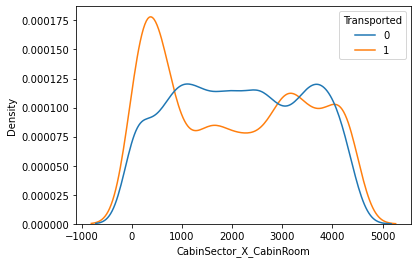

In [282]:
plot_hue_kde(df, 'CabinSector_X_CabinRoom', 'Transported')

In [287]:
sector_room_key[1000:1010], sector_room_key[2000:2010], sector_room_key[2500:3200]

([(1000, 'CabinSector5CabinRoom135'),
  (1001, 'CabinSector5CabinRoom136'),
  (1002, 'CabinSector5CabinRoom137'),
  (1003, 'CabinSector5CabinRoom138'),
  (1004, 'CabinSector5CabinRoom139'),
  (1005, 'CabinSector5CabinRoom14'),
  (1006, 'CabinSector5CabinRoom140'),
  (1007, 'CabinSector5CabinRoom141'),
  (1008, 'CabinSector5CabinRoom142'),
  (1009, 'CabinSector5CabinRoom143')],
 [(2000, 'CabinSector6CabinRoom1528'),
  (2001, 'CabinSector6CabinRoom1529'),
  (2002, 'CabinSector6CabinRoom153'),
  (2003, 'CabinSector6CabinRoom1531'),
  (2004, 'CabinSector6CabinRoom1532'),
  (2005, 'CabinSector6CabinRoom1533'),
  (2006, 'CabinSector6CabinRoom1534'),
  (2007, 'CabinSector6CabinRoom1535'),
  (2008, 'CabinSector6CabinRoom1536'),
  (2009, 'CabinSector6CabinRoom1537')],
 [(2500, 'CabinSector6CabinRoom366'),
  (2501, 'CabinSector6CabinRoom367'),
  (2502, 'CabinSector6CabinRoom368'),
  (2503, 'CabinSector6CabinRoom369'),
  (2504, 'CabinSector6CabinRoom37'),
  (2505, 'CabinSector6CabinRoom370'),
  (

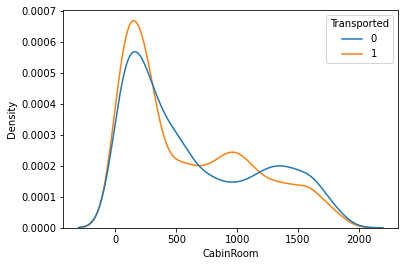

In [283]:
plot_hue_kde(df, 'CabinRoom', 'Transported')

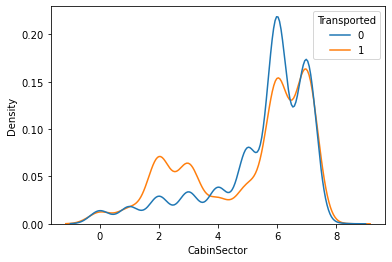

In [284]:
plot_hue_kde(df, 'CabinSector', 'Transported')

In [292]:
sector_room_class_key = create_mixed_categorical(df, 'CabinSector_X_CabinRoom', 'CabinClass')

In [289]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,FirstName,LastName,CabinSector,CabinRoom,CabinClass,HomePlanet_X_Destination,Age_X_CryoSleep,CryoSleep_X_Age,CabinSector_X_CabinRoom,CabinSector_X_CabinRoom_X_CabinClass
0,0001_01,2,1,3,39.0,1,0.0,0.0,0.0,0.0,...,Maham,1432,2,0,1,11,99,94,98,6540
1,0002_01,1,1,3,24.0,1,109.0,9.0,25.0,549.0,...,Juanna,2110,6,0,2,7,51,78,1489,799
2,0003_01,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,...,Altark,1991,1,0,2,11,161,115,1,1658
3,0003_02,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,...,Solam,1991,1,0,2,11,81,88,1,1658
4,0004_01,1,1,3,16.0,1,303.0,70.0,151.0,565.0,...,Willy,1779,6,1,2,7,24,69,1490,803


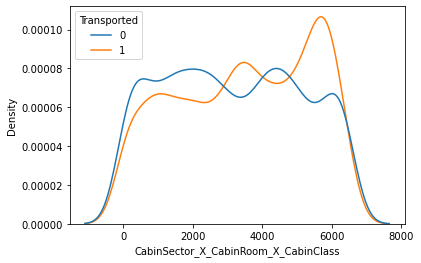

In [290]:
plot_hue_kde(df, 'CabinSector_X_CabinRoom_X_CabinClass', 'Transported')

In [293]:
class_sector_room_key = create_mixed_categorical(df, 'CabinClass', 'CabinSector_X_CabinRoom')

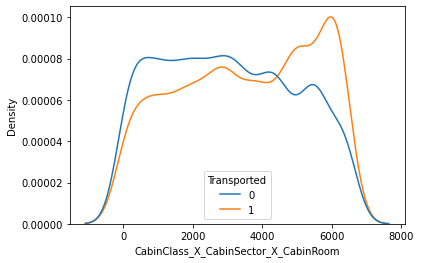

In [294]:
plot_hue_kde(df, 'CabinClass_X_CabinSector_X_CabinRoom', 'Transported')

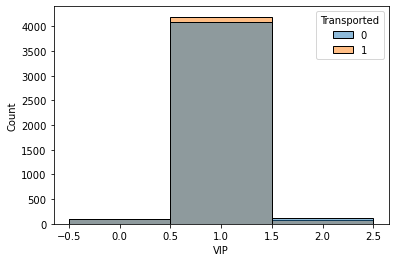

In [297]:
plot_hue_hist(df, 'VIP', 'Transported', kde=False)

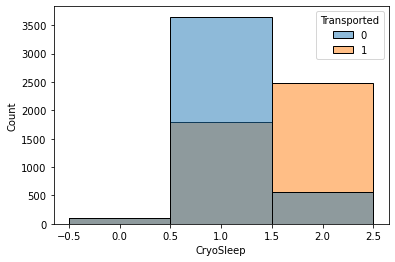

In [298]:
plot_hue_hist(df, 'CryoSleep', 'Transported', kde=False)

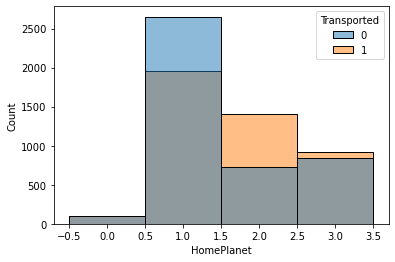

In [299]:
plot_hue_hist(df, 'HomePlanet', 'Transported', kde=False)

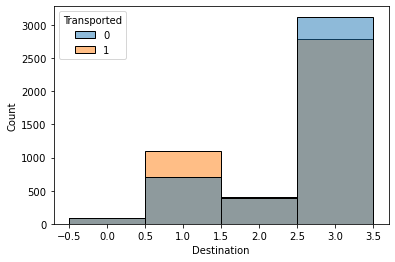

In [301]:
plot_hue_hist(df, 'Destination', 'Transported', kde=False)

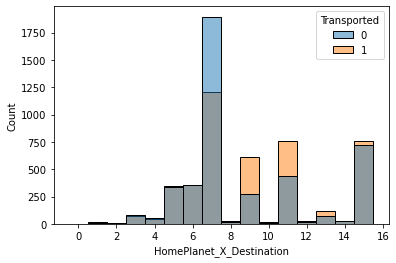

In [300]:
plot_hue_hist(df, 'HomePlanet_X_Destination', 'Transported', kde=False)

In [302]:
home_destination_cryo_key = create_mixed_categorical(df, 'HomePlanet_X_Destination', 'CryoSleep')

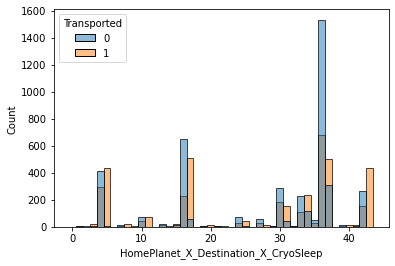

In [303]:
plot_hue_hist(df, 'HomePlanet_X_Destination_X_CryoSleep', 'Transported', kde=False)

In [304]:
home_destination_cryo_key

[(0, 'HomePlanet_X_Destination0CryoSleep1'),
 (1, 'HomePlanet_X_Destination10CryoSleep1'),
 (2, 'HomePlanet_X_Destination10CryoSleep2'),
 (3, 'HomePlanet_X_Destination11CryoSleep0'),
 (4, 'HomePlanet_X_Destination11CryoSleep1'),
 (5, 'HomePlanet_X_Destination11CryoSleep2'),
 (6, 'HomePlanet_X_Destination12CryoSleep0'),
 (7, 'HomePlanet_X_Destination12CryoSleep1'),
 (8, 'HomePlanet_X_Destination12CryoSleep2'),
 (9, 'HomePlanet_X_Destination13CryoSleep0'),
 (10, 'HomePlanet_X_Destination13CryoSleep1'),
 (11, 'HomePlanet_X_Destination13CryoSleep2'),
 (12, 'HomePlanet_X_Destination14CryoSleep0'),
 (13, 'HomePlanet_X_Destination14CryoSleep1'),
 (14, 'HomePlanet_X_Destination14CryoSleep2'),
 (15, 'HomePlanet_X_Destination15CryoSleep0'),
 (16, 'HomePlanet_X_Destination15CryoSleep1'),
 (17, 'HomePlanet_X_Destination15CryoSleep2'),
 (18, 'HomePlanet_X_Destination1CryoSleep0'),
 (19, 'HomePlanet_X_Destination1CryoSleep1'),
 (20, 'HomePlanet_X_Destination1CryoSleep2'),
 (21, 'HomePlanet_X_Destina

In [305]:
home_destination_key = create_mixed_categorical(df, 'HomePlanet', 'Destination')

In [306]:
home_destination_key

[(0, 'HomePlanet0Destination0'),
 (1, 'HomePlanet0Destination1'),
 (2, 'HomePlanet0Destination2'),
 (3, 'HomePlanet0Destination3'),
 (4, 'HomePlanet1Destination0'),
 (5, 'HomePlanet1Destination1'),
 (6, 'HomePlanet1Destination2'),
 (7, 'HomePlanet1Destination3'),
 (8, 'HomePlanet2Destination0'),
 (9, 'HomePlanet2Destination1'),
 (10, 'HomePlanet2Destination2'),
 (11, 'HomePlanet2Destination3'),
 (12, 'HomePlanet3Destination0'),
 (13, 'HomePlanet3Destination1'),
 (14, 'HomePlanet3Destination2'),
 (15, 'HomePlanet3Destination3')]

In [311]:
test = pd.DataFrame([[1,2],[3,4]], columns=['Col1', 'Col2'])
test

,Col1,Col2
0,1,2
1,3,4


In [316]:
test = test.append([[5, 6, 7],[6],[7]])
test

,Col1,Col2,0,1,2
0,1.0,2.0,NaN,NaN,NaN
1,3.0,4.0,NaN,NaN,NaN
0,NaN,NaN,5.0,6.0,7.0
1,NaN,NaN,6.0,NaN,NaN
2,NaN,NaN,7.0,NaN,NaN


In [333]:
test2 = pd.DataFrame([[1,2,3,4,5]], columns=['Col1', 'Col3', 1, 2, 3])
test2

,Col1,Col3,1,2,3
0,1,2,3,4,5


In [334]:
test.columns

Index(['Col1', 'Col2', 0, 1, 2], dtype='object')

In [335]:
def update_cols(df, target_cols):
    res = pd.DataFrame()
    for col in target_cols:
        if col in df:
            res[col] = df[col]
        else:
            res[col] = np.NaN
    return res

In [336]:
update_cols(test2, test.columns)

,Col1,Col2,0,1,2
0,1,NaN,NaN,3,4


In [337]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'ImputedValues', 'FirstName', 'LastName', 'CabinSector',
       'CabinRoom', 'CabinClass', 'HomePlanet_X_Destination',
       'Age_X_CryoSleep', 'CryoSleep_X_Age', 'CabinSector_X_CabinRoom',
       'CabinSector_X_CabinRoom_X_CabinClass',
       'CabinClass_X_CabinSector_X_CabinRoom',
       'HomePlanet_X_Destination_X_CryoSleep'],
      dtype='object')

In [341]:
df['TotalSpend'] = df.loc[:, 'RoomService':'VRDeck'].sum(axis=1)

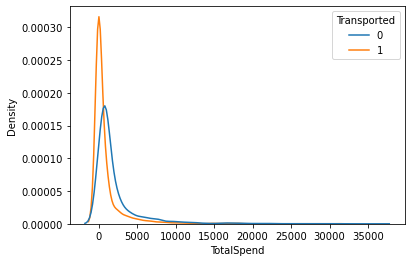

In [342]:
plot_hue_kde(df, 'TotalSpend', 'Transported')